In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("../../../Divar.csv")

C:\Users\Rumi\AppData\Local\Temp\ipykernel_14716\2225313960.py:6: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../../Divar.csv")


<div  dir="rtl" align="right">

در دسته‌بندی امکانات موجود در آگهی‌ها می‌توانیم آنها را به دو دسته‌ی امکانات لاکچری(استخر، باربیکیو، سونا، جکوزی) و امکانات غیر لاکچری تقسیم کنیم. فرضیه‌ی ما این است که میانگین مبلغ قیمت برای وجود ویژگی‌های لاکچری افزایش چشم‌گیری دارد. اما آیا این میانگین برای وجود امکانات غیرلاکچری نیز تفاوت معناداری دارد؟

<div  dir="rtl" align="right">


### جدا کردن فضا های فرضیه:


#### امکانات لاکچری
فرضیه صفر (H₀)

میانگین قیمت آگهی‌هایی که حداقل یکی از امکانات لاکچری (استخر، سونا، جکوزی یا باربیکیو) را دارند،
با میانگین قیمت آگهی‌هایی که هیچ‌کدام از این امکانات را ندارند تفاوت معناداری ندارد.

فرضیه مقابل (H₁)

میانگین قیمت آگهی‌هایی که حداقل یکی از امکانات لاکچری (استخر، سونا، جکوزی یا باربیکیو) را دارند،
به‌طور معناداری بیشتر از میانگین قیمت آگهی‌هایی است که فاقد این امکانات هستند.


#### امکانات غیرلاکچری

فرضیه صفر (H₀)

میانگین قیمت آگهی‌هایی که دارای امکانات غیرلاکچری هستند،
با میانگین قیمت آگهی‌هایی که فاقد این امکانات‌اند تفاوت معناداری ندارد.

فرضیه مقابل (H₁)

میانگین قیمت آگهی‌هایی که دارای امکانات غیرلاکچری هستند،
با میانگین قیمت آگهی‌هایی که فاقد این امکانات‌اند تفاوت معناداری دارد.

In [ ]:
luxury_columns = [
    'has_pool',
    'has_jacuzzi',
    'has_sauna', 
    'has_barbecue']

df4 = df.copy()
df4 = df4[~df4["price_value"].isna()]
df4["has_luxury"] = df4[luxury_columns].any(axis=1)
df_luxury = df4[df4["has_luxury"]]
df_not_luxury = df4[~df4["has_luxury"]]

non_luxury_columns = [
    'has_elevator',
    'has_parking',
    'has_warehouse',
    'has_balcony',
    'has_heating_system',
    'has_cooling_system',
    'has_security_guard',
    'has_water',
    'has_gas',
    'has_electricity',
    'has_restroom'
]

df4["has_non_luxury"] = df4[non_luxury_columns].any(axis= 1)

df_non_luxury = df4[df4["has_non_luxury"]]
df_not_non_luxury = df4[~df4["has_non_luxury"]]

In [47]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(df_luxury["price_value"] , df_not_luxury["price_value"])

if p_value < 0.05:
    print('Reject Null Hypothesis (Significant difference between two samples) p =', p_value)
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples) p =' ,p_value)



Reject Null Hypothesis (Significant difference between two samples) p = 4.296161216158544e-08


In [48]:

stat, p_value = mannwhitneyu(df_non_luxury["price_value"] , df_not_non_luxury["price_value"])

if p_value < 0.05:
    print('Reject Null Hypothesis (Significant difference between two samples) p =', p_value)
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples) p =' ,p_value)



Reject Null Hypothesis (Significant difference between two samples) p = 0.0


<div  dir="rtl" align="right">


«نتایج آزمون Mann–Whitney U نشان داد که هم وجود امکانات لاکچری و هم وجود امکانات غیرلاکچری منجر به تفاوت معنادار در قیمت آگهی‌ها می‌شود (p-value < 0.05). با این حال، اثر امکانات لاکچری از نظر شدت و تفاوت قیمتی قوی‌تر و چشم‌گیرتر است.»

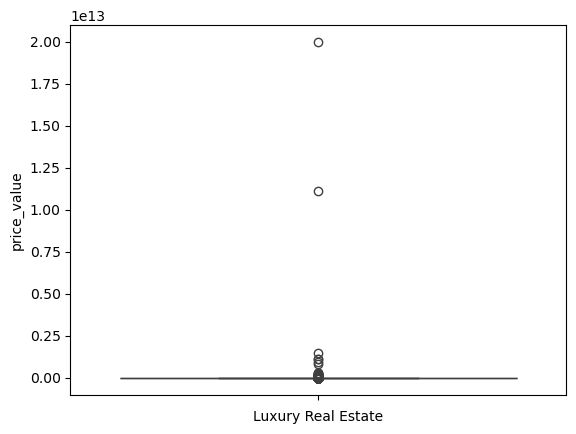

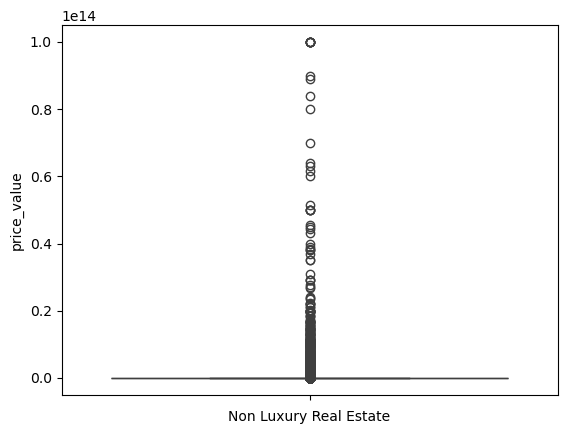

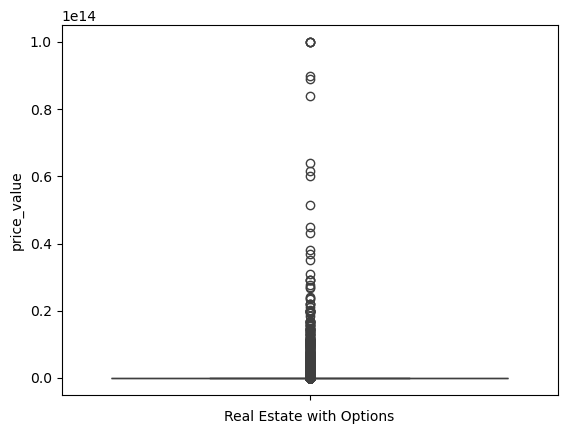

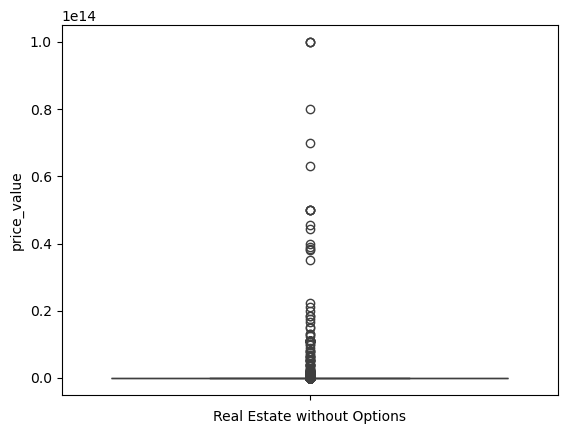

In [53]:
sns.boxplot(df_luxury["price_value"])
plt.xlabel("Luxury Real Estate")
plt.show()
sns.boxplot(df_not_luxury["price_value"])
plt.xlabel("Non Luxury Real Estate")
plt.show()

sns.boxplot(df_non_luxury["price_value"])
plt.xlabel("Real Estate with Options")
plt.show()
sns.boxplot(df_not_non_luxury["price_value"])
plt.xlabel("Real Estate without Options")
plt.show()


In [54]:
non_luxury_columns = [
    'has_elevator',
    'has_parking',
    'has_warehouse',
    'has_balcony',
    'has_heating_system',
    'has_cooling_system',
    'has_security_guard',
]

df4["has_non_luxury"] = df4[non_luxury_columns].any(axis= 1)

df_non_luxury = df4[df4["has_non_luxury"]]
df_not_non_luxury = df4[~df4["has_non_luxury"]]


stat, p_value = mannwhitneyu(df_non_luxury["price_value"] , df_not_non_luxury["price_value"])

if p_value < 0.05:
    print('Reject Null Hypothesis (Significant difference between two samples) p =', p_value)
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples) p =' ,p_value)



Reject Null Hypothesis (Significant difference between two samples) p = 0.0
